#### Youtube Tutorial using Python in Finance problems

##### Part 1

In [60]:
%matplotlib notebook
import datetime as dt
import pandas as pd 
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [3]:
style.use('ggplot')

In [4]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [6]:
df = web.DataReader('TSLA', 'yahoo', start, end)

In [7]:
df.to_csv('TSLA.csv')

###### Part 2

In [8]:
df = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


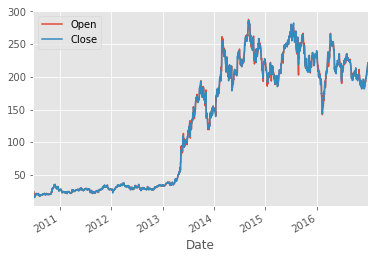

In [9]:
df[['Open', 'Close']].plot()
plt.show()

###### Part 3

In [10]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
#df.dropna(inplace=True)

df.head()

,Open,High,Low,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,20.998000


<IPython.core.display.Javascript object>


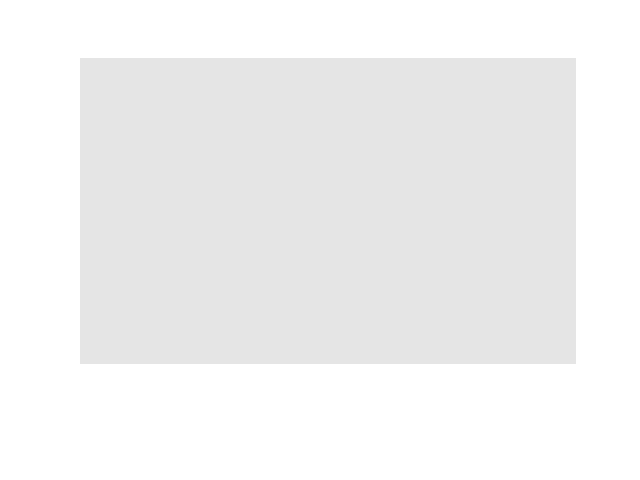

In [46]:
#Create a grid of subplots with size 6x1. ax1 spans 5 rows and 1 col. ax2 spans 1 row and 1 col

ax1 = plt.subplot2grid((10,1), (0,0), rowspan=7, colspan=1)
ax2 = plt.subplot2grid((10,1), (7,0), rowspan=3, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

##### Part 4

<IPython.core.display.Javascript object>


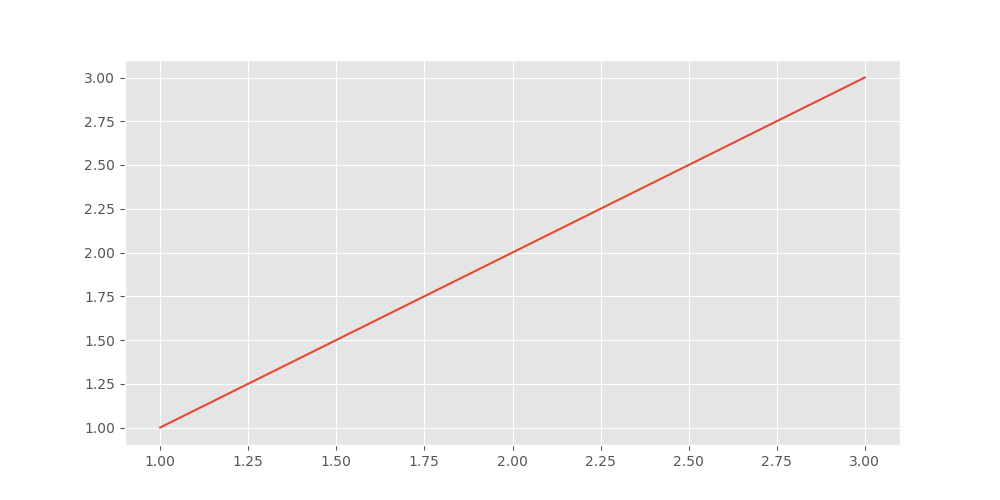

In [30]:
plt.figure(figsize=(10,5))
x = [1,2,3]
plt.plot(x, x)
plt.show()

In [32]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [33]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [38]:
df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

,level_0,index,Date,open,high,low,close
0,0,0,733952.0,23.889999,23.889999,15.800000,17.459999
1,1,1,733962.0,17.400000,20.639999,17.049999,20.639999
2,2,2,733972.0,21.910000,21.910000,20.219999,20.719999
3,3,3,733982.0,20.350000,21.950001,19.590000,19.590000
4,4,4,733992.0,19.600000,19.600000,17.600000,19.150000


<IPython.core.display.Javascript object>


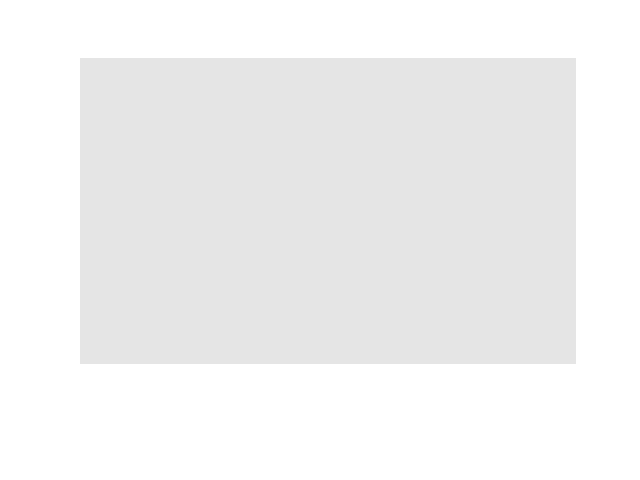

In [61]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()